In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy import *
from tqdm.notebook import tqdm

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, Conv3D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

In [4]:
!pip install patool
import patoolib

     |████████████████████████████████| 81kB 6.1MB/s 


In [5]:
patoolib.extract_archive("/content/drive/My Drive/KananPark/Dataset/Small.rar", outdir="/content/")

patool: Extracting /content/drive/My Drive/KananPark/Dataset/Small.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/KananPark/Dataset/Small.rar"
patool:     with cwd='/content/'
patool: ... /content/drive/My Drive/KananPark/Dataset/Small.rar extracted to `/content/'.


'/content/'

In [0]:
from tqdm.notebook import tqdm

In [0]:
num_classes = 5

## **Import and Load Train**

In [0]:
Entire = os.listdir('/content/Small/Train/Entire')
Flower = os.listdir('/content/Small/Train/Flower')
Fruit = os.listdir('/content/Small/Train/Fruit')
Leaf = os.listdir('/content/Small/Train/Leaf')
Leaf_sheet = os.listdir('/content/Small/Train/Leaf - Sheet')
Stem = os.listdir('/content/Small/Train/Stem')

In [0]:
img_matrix = []
label = []

In [10]:
# 0: Entire
for file in tqdm(Entire) :
   im = np.array(Image.open('/content/Small/Train/Entire' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(0)

In [11]:
# 1: Flower
for file in tqdm(Flower) :
   im = np.array(Image.open('/content/Small/Train/Flower' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(1)

In [12]:
# 2: Fruit
for file in tqdm(Fruit) :
   im = np.array(Image.open('/content/Small/Train/Fruit' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(2)

In [13]:
# 3: Leaf
for file in tqdm(Leaf) :
   im = np.array(Image.open('/content/Small/Train/Leaf' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(3)

In [14]:
for file in tqdm(Leaf_sheet) :
   im = np.array(Image.open('/content/Small/Train/Leaf - Sheet' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(3)

In [15]:
# 4: Stem
for file in tqdm(Stem) :
   im = np.array(Image.open('/content/Small/Train/Stem' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(4)

## **Import and Load Test**

In [0]:
Test_Entire = os.listdir('/content/Small/Test/Entire')
Test_Flower = os.listdir('/content/Small/Test/Flower')
Test_Fruit = os.listdir('/content/Small/Test/Fruit')
Test_Leaf = os.listdir('/content/Small/Test/Leaf')
Test_Leaf_sheet = os.listdir('/content/Small/Test/Leaf - Sheet')
Test_Stem = os.listdir('/content/Small/Test/Stem')

In [0]:
test_matrix = []
test_label = []

In [18]:
for file in tqdm(Test_Entire) :
   im = np.array(Image.open('/content/Small/Test/Entire' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(0)

In [19]:
for file in tqdm(Test_Flower) :
   im = np.array(Image.open('/content/Small/Test/Flower' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(1)

In [20]:
for file in tqdm(Test_Fruit) :
   im = np.array(Image.open('/content/Small/Test/Fruit' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(2)

In [21]:
for file in tqdm(Test_Leaf) :
   im = np.array(Image.open('/content/Small/Test/Leaf' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(3)

In [22]:
for file in tqdm(Test_Leaf_sheet) :
   im = np.array(Image.open('/content/Small/Test/Leaf - Sheet' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(3)

In [23]:
for file in tqdm(Test_Stem) :
   im = np.array(Image.open('/content/Small/Test/Stem' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(4)

## **Visualisation**

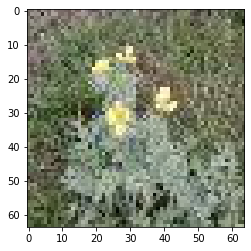

Label: 0


In [24]:
# Train set
img = img_matrix[256].reshape(64, 64, 3)
plt.imshow(img)
plt.show()
print('Label:', label[256])

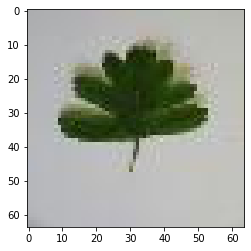

Label: 3


In [25]:
# Test set
img = test_matrix[4356].reshape(64, 64, 3)
plt.imshow(img)
plt.show()
print('Label:', test_label[4356])

## **Preprocessing**

In [0]:
Train_data, Train_Label = shuffle(img_matrix,label , random_state = 2)
train_data = [Train_data, Train_Label]

In [0]:
Test_data, Test_Label = shuffle(test_matrix,test_label , random_state = 2)
test_data = [Test_data, Test_Label]

### **Visualisation**

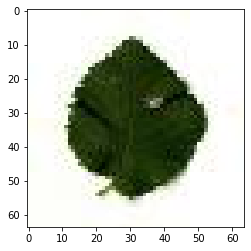

Label: 3


In [28]:
img = Train_data[4256].reshape(64, 64, 3)
plt.imshow(img)
plt.show()
print('Label:', Train_Label[4256])

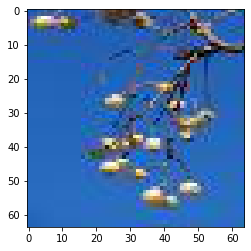

Label: 2


In [29]:
img = Test_data[4256].reshape(64, 64, 3)
plt.imshow(img)
plt.show()
print('Label:', Test_Label[4256])

### **Reshaping**

In [0]:
(X,y) = (train_data[0],train_data[1])

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 4)

In [0]:
X_train = np.reshape(X_train, (np.shape(X_train)[0],3, 64, 64))
X_val = np.reshape(X_val, (np.shape(X_val)[0],3, 64, 64))

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes)

In [0]:
X_test = np.reshape(Test_data, (np.shape(Test_data)[0],3, 64, 64))
Y_test = np_utils.to_categorical(Test_Label, num_classes)

In [35]:
print('X_train:',X_train.shape)
print('X_val:',X_val.shape)

X_train: (16788, 3, 64, 64)
X_val: (4197, 3, 64, 64)


## **Model**

In [0]:
model = Sequential()
model.add(Conv2D(64, (9, 9), padding='same',
                 input_shape = X_train.shape[1:], data_format="channels_first"))
model.add(Activation('selu'))
model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.01))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('selu'))
model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('selu'))
model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('selu'))
model.add(Dense(64))
model.add(Activation('selu'))
model.add(Dense(32))
model.add(Activation('selu'))
model.add(Dense(16))
model.add(Activation('selu'))
model.add(Dense(8))
model.add(Activation('selu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softplus'))

In [37]:
opt = keras.optimizers.RMSprop(lr=0.01, decay=1e-2)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train,
              batch_size = 64,
              epochs= 150,verbose = 1,
              validation_data=(X_val, Y_val))

16788/16788 [==============================] - 7s 435us/step - loss: 0.5291 - acc: 0.8094 - val_loss: 0.5762 - val_acc: 0.7956
Epoch 140/150
16788/16788 [==============================] - 7s 432us/step - loss: 0.5370 - acc: 0.8081 - val_loss: 0.5672 - val_acc: 0.7941
Epoch 141/150
16788/16788 [==============================] - 7s 433us/step - loss: 0.5353 - acc: 0.8075 - val_loss: 0.5671 - val_acc: 0.7960
Epoch 142/150
16788/16788 [==============================] - 7s 433us/step - loss: 0.5282 - acc: 0.8112 - val_loss: 0.5671 - val_acc: 0.7980
Epoch 143/150
16788/16788 [==============================] - 7s 434us/step - loss: 0.5301 - acc: 0.8070 - val_loss: 0.5682 - val_acc: 0.7965
Epoch 144/150
16788/16788 [==============================] - 7s 433us/step - loss: 0.5328 - acc: 0.8071 - val_loss: 0.5757 - val_acc: 0.7970
Epoch 145/150
16788/16788 [==============================] - 7s 429us/step - loss: 0.5280 - acc: 0.8099 - val_loss: 0.5667 - val_acc: 0.7963
Epoch 146/150
16788/16788 [

In [39]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

5092/5092 [==============================] - 1s 189us/step
Test loss: 0.953386474198838
Test accuracy: 0.6633935585231736


## **Inference**

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        15616     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)       

In [0]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

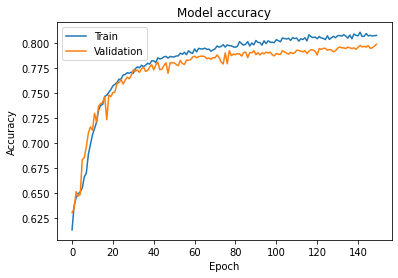

In [42]:
plt.plot(history.history['acc'],label = 'Train')
plt.plot(history.history['val_acc'],label = 'Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

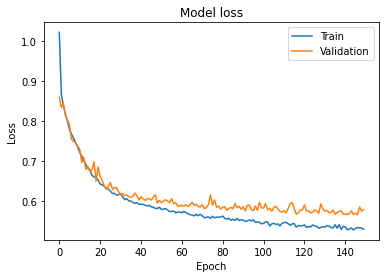

In [43]:
plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'],label = 'Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

In [0]:
model.save('my_model.h5')

## **State of art Models**

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model